UNIVERSIDAD GALILEO

STATISTICAL LEARNING

Marco Vinicio Escalante Lara

Carnet: 19001148

In [1]:

import numpy as np
import imageio as imio
import matplotlib.pyplot as plt
import tensorflow as tf

# Clasificación con K-nearest neighbors
En este notebook vamos a implementar K-nearest neighbor, nuestro algoritmo va a **clasificar** a que raza pertenece la imagen de un perro, para entrenar nuestro algoritmo vamos a utilizar un set de datos contiene imagenes de 120 razas de perros, en total son 10,222 imagenes.

Data: [Dog Breed Identification](https://www.kaggle.com/c/dog-breed-identification/data)

#### Pre-procesamiento

El pre-procesamiento ya fue realizado y el dataset preparado y esta listo para usarse, para esto se aplico un proceso conocido como "transfer learning" usando la red neuronal "Inception" de Google(tema a cubrirse en proximas clases)  , para esta tarea ignoremos este detalle  y pensemos que se nos da un dataset con features donde cada columna representa una característica de entrada importante,pero no nos interesa conocer los detalles. 

Estas features/características fueron almacenadas en un matriz de numpy.

En esta parte del notebook solo hay que ejecutar las celdas para cargar los datos, estos datos van a servir de entrada para nuestra implementación de K-nearest neighbors con tensorflow.

### Referencias opcionales para transfer learning y "Google inception"
##### Inception
https://www.tensorflow.org/tutorials/image_recognition

https://research.googleblog.com/2016/03/train-your-own-image-classifier-with.html

##### Transfer Learning
https://www.datacamp.com/community/tutorials/transfer-learning

In [2]:
images_inception_features = './pre-processing/training_inception_features_array.npy'
training_image_labels_array = './pre-processing/training_image_labels_array.npy'
training_image_names_array = './pre-processing/training_image_names_array.npy'

In [3]:
TRAIN_DICTIONARY_KEYS = ["images", "label","features"]

training_set_dict = dict()
    
training_set_dict['images_name'] = np.load(training_image_names_array,allow_pickle=True)
training_set_dict['label'] = np.load(training_image_labels_array,allow_pickle=True)
training_set_dict['features'] = np.load(images_inception_features,allow_pickle=True)

#  K-Means 

La data la vamos a manejar en los siguientes 3 arreglos: 

- features    : features de la imagen dadas por google Inception
- labels      : label de la imagen, identifica que raza es
- images_name : nombre de la imgen original, si descargan el dataset con link en la descripcion pueden buscar la imagen original por este nombre.

In [4]:
## Cargamos las features y las labes de cada feature
features = training_set_dict['features']
labels = training_set_dict['label']
images_name = training_set_dict['images_name']

## Trabajando los datos

Para poder trabajar las gráficas se tiene que convertir a número las etiquetas, lo cual se trabajara con la función unique de numpy, que nos indica los valores unicos y les asigna una numeración.

In [5]:
len(features)
nombres, indice = np.unique(labels, return_inverse=True)
nombres

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

Las labels pertenecientes a las features tienen el mismo indice, Ejemplo:

Label:  golden_retriever
Nombre:  0021f9ceb3235effd7fcde7f7538ed62


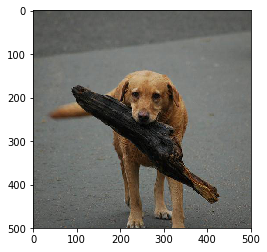

In [6]:
# Indice 4

print('Label: ',labels[4])

print('Nombre: ',images_name[4])

img = imio.imread('./data/train/'+images_name[4]+'.jpg')
plt.imshow(img)


# Implementación de PCA

In [7]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_openml

from sklearn.decomposition import PCA



In [8]:
features.shape

(10222, 2048)

In [9]:
pca = PCA(n_components=2)
pca.fit(features) 
Nfeatures = pca.transform(features)

In [10]:
Nfeatures.shape

(10222, 2)

Text(0, 0.5, 'component 2')

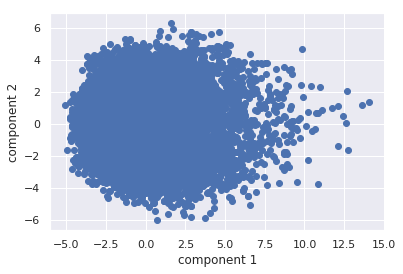

In [11]:
plt.scatter(Nfeatures[:, 0], Nfeatures[:, 1])
plt.xlabel('component 1')
plt.ylabel('component 2')

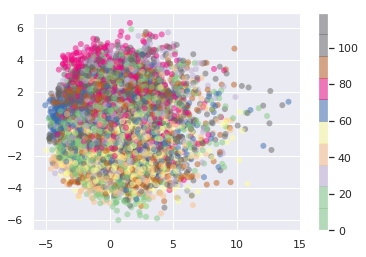

In [13]:
plt.scatter(Nfeatures[:, 0], Nfeatures[:, 1],
            c=indice, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.colorbar()

# Cluster

Se trabajaran los cluster para asignar a los perros.

In [14]:
from sklearn.cluster import KMeans

In [24]:
kmeans = KMeans(n_clusters=20, random_state=0)
kmeans.fit(Nfeatures)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [25]:
centro = kmeans.cluster_centers_
centro

array([[-2.9444242 , -2.0616283 ],
       [-1.3157489 ,  3.4161792 ],
       [ 3.905794  , -0.20846555],
       [ 9.242676  ,  0.50935763],
       [-0.48395067,  1.8718781 ],
       [-1.6573467 ,  0.50356126],
       [ 1.0998883 , -3.2771335 ],
       [-2.5664403 ,  1.9590284 ],
       [ 3.2866194 ,  3.146091  ],
       [ 5.974411  , -2.047719  ],
       [ 5.7457633 ,  1.8671275 ],
       [ 1.8717166 , -1.2778493 ],
       [-3.4142973 ,  0.08699976],
       [-1.1586097 , -2.9738684 ],
       [-1.6328318 , -1.086694  ],
       [ 1.7298629 ,  1.1716702 ],
       [ 3.413089  , -3.002691  ],
       [ 0.13502939,  0.02208746],
       [ 0.94870067,  3.309912  ],
       [-0.01058894, -1.6201346 ]], dtype=float32)

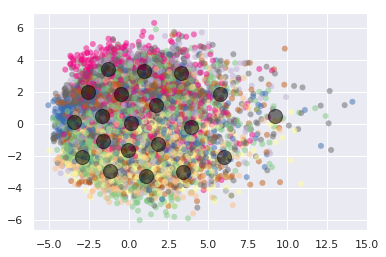

In [26]:
plt.scatter(Nfeatures[:, 0], Nfeatures[:, 1],
            c=indice, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
plt.scatter(centro[:, 0], centro[:, 1], c='black', s=200, alpha=0.5);

# Conclusiones / Recomendaciones

1. Al ver la dispersión de la data en en las gráficas de dos dimensiones, no se puede apreciar una agrupación muy bien definida de los datos.
2. Se trabajo con 20 nucleos que tratan de identificar los grupos de perros.
3. El emplear librerias de python como sklearn facilita la comprensión de temas relevantes para la ciencia de datos ya que permiten llevar algo abstracto a números y gráficas facilmente entendibles.
4. Estas herramientas al permitir gráficar en dos dimensiones la información permiten identificar visualmente algunos componentes abstractos de información.
5. Al hacer la prueba con más de 20 núcleos, concentra los nucleos al centro de la figura, por lo que al hacer uns descripción de los mismos permitiria encontrar mejor los segmentos.
6. Tratar de seguir con esta metodología que permite, tanto experimentar como llevar a la practica el conocimiento adquirido en la clase.